In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler 

In [57]:
# Load the data
df = pd.read_csv('student-scores.csv')
print(df.head())

   id first_name last_name                                  email  gender  \
0   1       Paul     Casey         paul.casey.1@gslingacademy.com    male   
1   2   Danielle  Sandoval  danielle.sandoval.2@gslingacademy.com  female   
2   3       Tina   Andrews       tina.andrews.3@gslingacademy.com  female   
3   4       Tara     Clark         tara.clark.4@gslingacademy.com  female   
4   5    Anthony    Campos     anthony.campos.5@gslingacademy.com    male   

   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours   career_aspiration  math_score  history_score  \
0                       27              Lawyer          73             81   
1         

In [58]:
# Drop the columns that are not needed
df = pd.DataFrame(df)
obselete_columns = ['id','first_name','last_name','email','gender', 'career_aspiration']
df.drop(obselete_columns, axis=1, inplace=True)
print(df.head())

df = pd.get_dummies(df, columns=['part_time_job', 'extracurricular_activities'], prefix=['part_time_job', 'extracurricular_activities'], dtype=int, )
print(df.head())

obselete_columns = ['part_time_job_False','extracurricular_activities_False']
df.drop(obselete_columns, axis=1, inplace=True)


   part_time_job  absence_days  extracurricular_activities  \
0          False             3                       False   
1          False             2                       False   
2          False             9                        True   
3          False             5                       False   
4          False             5                       False   

   weekly_self_study_hours  math_score  history_score  physics_score  \
0                       27          73             81             93   
1                       47          90             86             96   
2                       13          81             97             95   
3                        3          71             74             88   
4                       10          84             77             65   

   chemistry_score  biology_score  english_score  geography_score  
0               97             63             80               87  
1              100             90             88          

In [59]:
df = df.explode(['weekly_self_study_hours'])

# Convert the 'weekly_self_study_hours' column to integer
df['weekly_self_study_hours'] = df['weekly_self_study_hours'].apply(lambda x: x[0] if isinstance(x, np.ndarray) else x).astype(np.int64)
df['extracurricular_activities_True'] = df['extracurricular_activities_True'].astype('int64')
# Save the modified data
df.to_csv('modified_student_scores.csv', index=False)

In [60]:
#initialise the independent variables

part_time_job = df['part_time_job_True'].values
weekly_self_study_hours = df['weekly_self_study_hours'].values
missing_days = df['absence_days'].values
extracurricular_activities = df['extracurricular_activities_True'].values

In [61]:
#intialise the dependent variables
math_score = df['math_score'].values
history_score = df['history_score'].values
physics_score = df['physics_score'].values
chemistry_score = df['chemistry_score'].values
biology_score = df['biology_score'].values
english_score = df['english_score'].values
geography_score = df['geography_score'].values


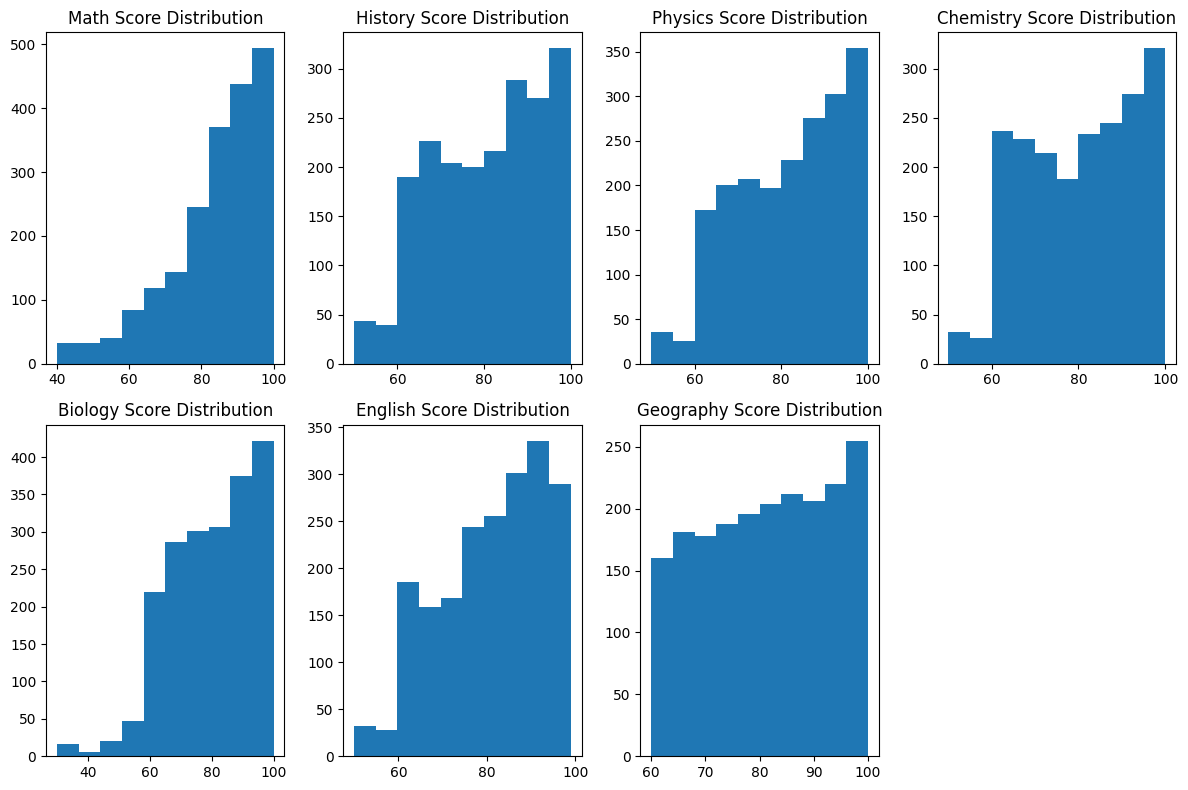

In [62]:

# Calculate the distribution of scores
math_score_dist = np.histogram(math_score, bins=10)
history_score_dist = np.histogram(history_score, bins=10)
physics_score_dist = np.histogram(physics_score, bins=10)
chemistry_score_dist = np.histogram(chemistry_score, bins=10)
biology_score_dist = np.histogram(biology_score, bins=10)
english_score_dist = np.histogram(english_score, bins=10)
geography_score_dist = np.histogram(geography_score, bins=10)

# Plot the distribution of scores
plt.figure(figsize=(12, 8))
plt.subplot(2, 4, 1)
plt.hist(math_score, bins=10)
plt.title('Math Score Distribution')

plt.subplot(2, 4, 2)
plt.hist(history_score, bins=10)
plt.title('History Score Distribution')

plt.subplot(2, 4, 3)
plt.hist(physics_score, bins=10)
plt.title('Physics Score Distribution')

plt.subplot(2, 4, 4)
plt.hist(chemistry_score, bins=10)
plt.title('Chemistry Score Distribution')

plt.subplot(2, 4, 5)
plt.hist(biology_score, bins=10)
plt.title('Biology Score Distribution')

plt.subplot(2, 4, 6)
plt.hist(english_score, bins=10)
plt.title('English Score Distribution')

plt.subplot(2, 4, 7)
plt.hist(geography_score, bins=10)
plt.title('Geography Score Distribution')

plt.tight_layout()
plt.show()


Above is the distributions for the scores the students perform in each subject in the dataset. 

Here we can see that maths sand biology has the most varying in distrubutions where students peform poorly in compared to any other subject with scors of 30-40. The rest The students perform with 60+ scores which is good. 

Physics score appear to be more concentrated in the middle range, with fewer scores at the extremes. This suggests that most students achieved a moderate level of competence in physics, but there were a few who excelled and a few who struggled. Chemistry is similar to this.

Biology scores appear to be more concentrated in the lower and middle ranges, with fewer scores at the highest range. This suggests that most students found biology somewhat challenging.

 Geography is fairly uniformly distributed with most students performing well. English is similar with students ,mostly performing highly.

 from 



<h1> Normalisation </h1>

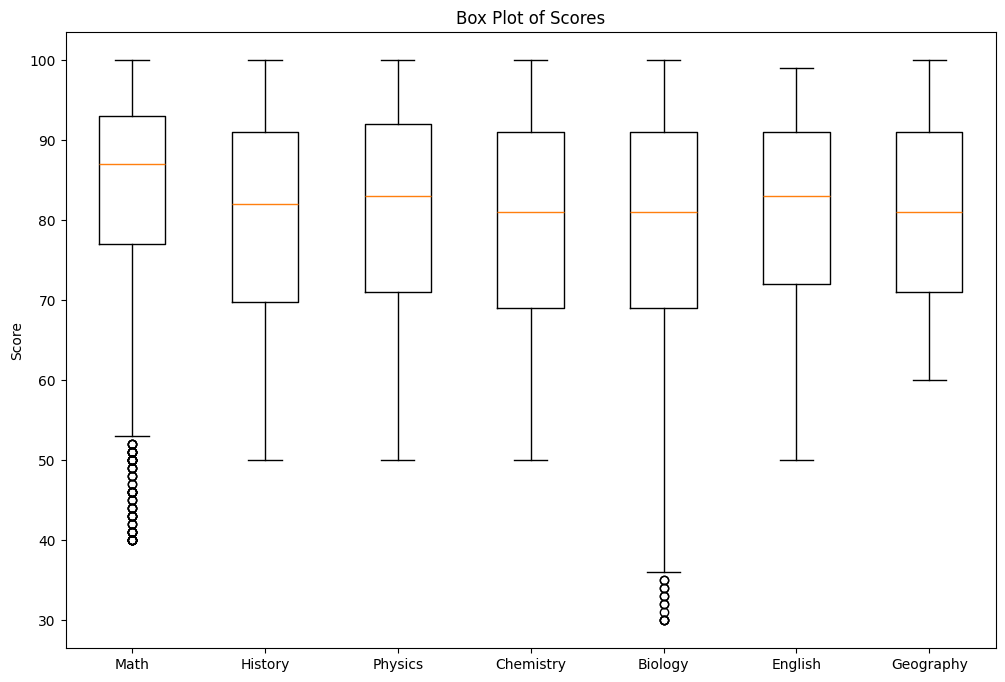

In [63]:
plt.figure(figsize=(12, 8))
plt.boxplot([math_score, history_score, physics_score, chemistry_score, biology_score, english_score, geography_score])
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Math', 'History', 'Physics', 'Chemistry', 'Biology', 'English', 'Geography'])
plt.ylabel('Score')
plt.title('Box Plot of Scores')

plt.show()

The boxes for math, physics, chemistry, and English have a similar spread, which suggests that the scores in these subjects are relatively evenly distributed. The boxes for history and biology appear to be wider, indicating a greater range of scores in these subjects.

The medians for math, physics, and chemistry are all higher than the medians for history, biology, and English. This suggests that students scored higher on average in math, physics, and chemistry compared to the other subjects.

There appear to be some outliers in Maths and Biology. They may indicate that there are students who performed much   lower than the majority of the class in those subjects.

In [64]:
def remove_outliers_iqr(df, column_name):
    """Removes outliers based on the interquartile range (IQR) method."""
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] > lower_bound) & (df[column_name] < upper_bound)]

# Filter outliers
df_filtered = df.copy() # Create a copy
df_filtered = remove_outliers_iqr(df_filtered, 'biology_score')
df_filtered = remove_outliers_iqr(df_filtered, 'math_score')

# Save the filtered data
df_filtered.to_csv('filtered_student_scores.csv', index=False)




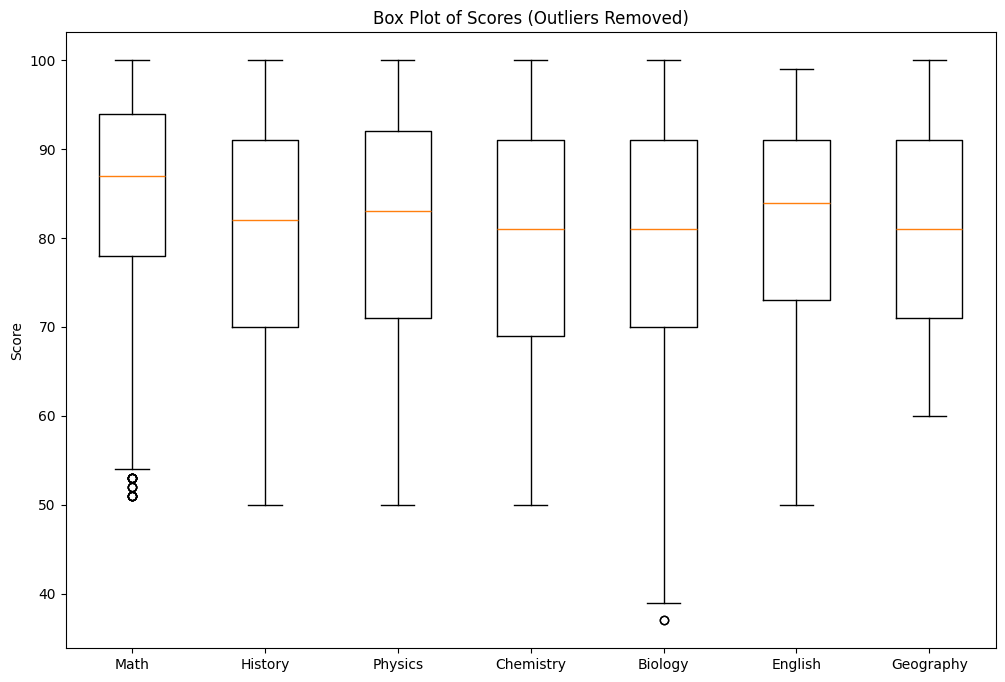

In [65]:
plt.figure(figsize=(12, 8))
plt.boxplot([df_filtered['math_score'], df_filtered['history_score'], 
             df_filtered['physics_score'], df_filtered['chemistry_score'], 
             df_filtered['biology_score'], df_filtered['english_score'], 
             df_filtered['geography_score']])
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Math', 'History', 'Physics', 'Chemistry', 'Biology', 'English', 'Geography'])
plt.ylabel('Score')
plt.title('Box Plot of Scores (Outliers Removed)') 
plt.show()

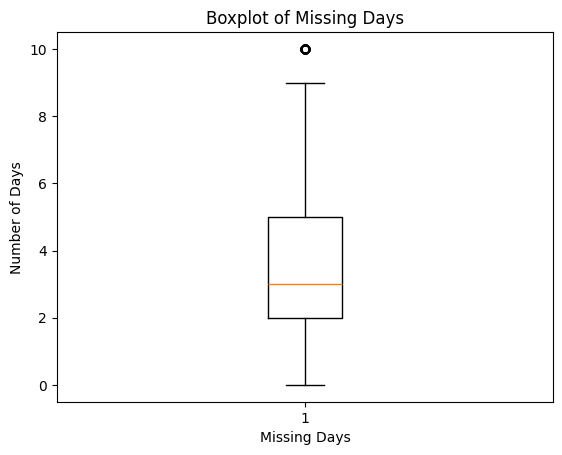

In [66]:
import matplotlib.pyplot as plt

plt.boxplot(missing_days)
plt.xlabel('Missing Days')
plt.ylabel('Number of Days')
plt.title('Boxplot of Missing Days')
plt.show()


In [67]:
df_filtered = remove_outliers_iqr(df_filtered, 'absence_days')

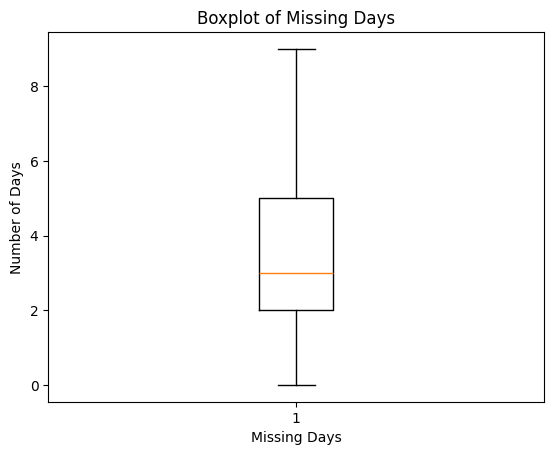

In [68]:
import matplotlib.pyplot as plt

plt.boxplot(df_filtered['absence_days'])
plt.xlabel('Missing Days')
plt.ylabel('Number of Days')
plt.title('Boxplot of Missing Days')
plt.show()


In [69]:
# Save the filtered data
df_filtered.to_csv('filtered_student_scores.csv', index=False)


In [70]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('filtered_student_scores.csv')

# Assign variables
missing_days = df['absence_days'].values
weekly_self_study_hours = df['weekly_self_study_hours'].values
math_score = df['math_score'].values
history_score = df['history_score'].values
physics_score = df['physics_score'].values
chemistry_score = df['chemistry_score'].values
biology_score = df['biology_score'].values
english_score = df['english_score'].values
geography_score = df['geography_score'].values
part_time_job = df['part_time_job_True'].values
extracurricular_activities = df['extracurricular_activities_True'].values


In [71]:
print("Missing days: ", missing_days)

Missing days:  [3 2 9 ... 2 5 5]


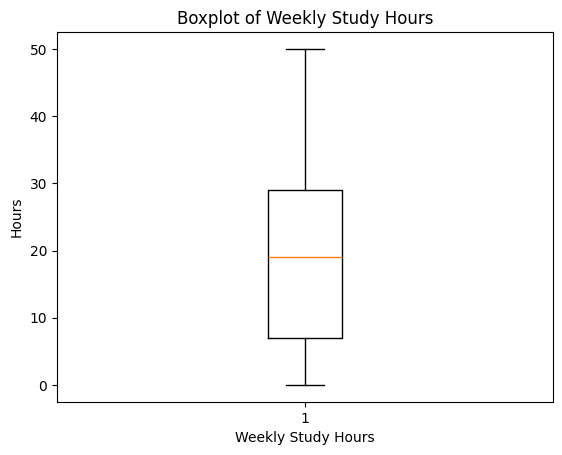

In [72]:
import matplotlib.pyplot as plt

# Assuming you have a variable called "weekly_self_study_hours" containing the data
plt.boxplot(weekly_self_study_hours)
plt.xlabel('Weekly Study Hours')
plt.ylabel('Hours')
plt.title('Boxplot of Weekly Study Hours')
plt.show()


In [73]:
df_filtered = df


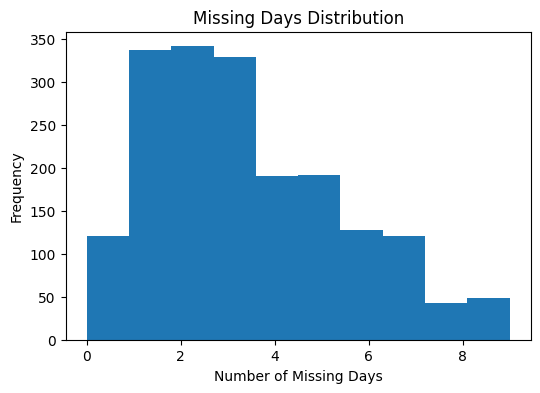

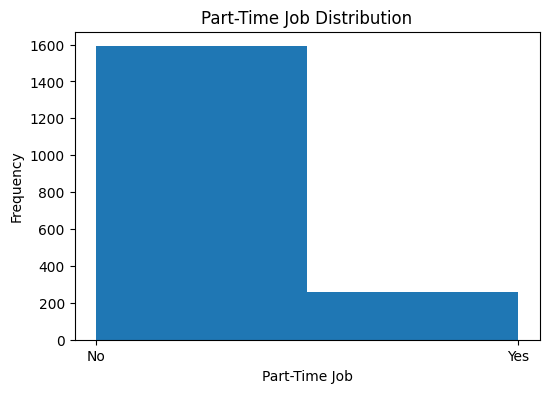

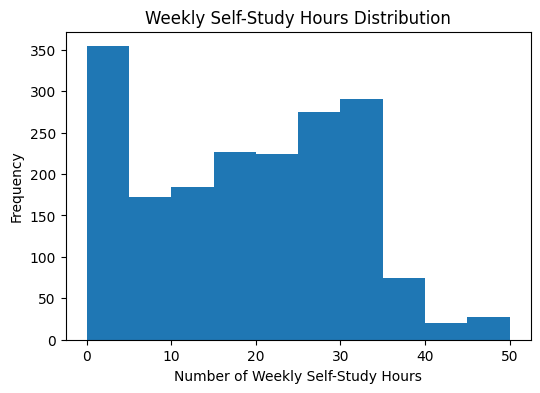

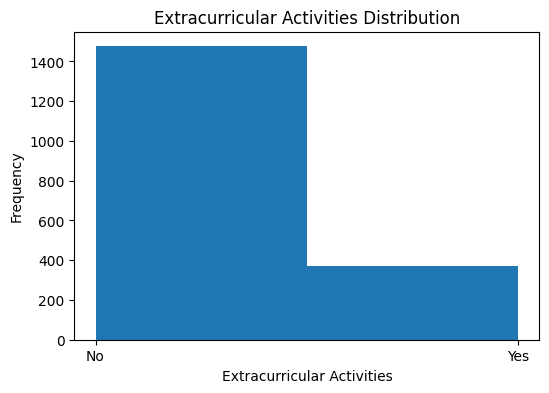

In [74]:

# Calculate the distribution of missing days
missing_days_dist = np.histogram(missing_days, bins=10)

# Plot the distribution of missing days
plt.figure(figsize=(6, 4))
plt.hist(missing_days, bins=10)
plt.title('Missing Days Distribution')
plt.xlabel('Number of Missing Days')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of part-time job
plt.figure(figsize=(6, 4))
plt.hist(part_time_job, bins=2)
plt.title('Part-Time Job Distribution')
plt.xlabel('Part-Time Job')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Plot the distribution of weekly self-study hours
plt.figure(figsize=(6, 4))
plt.hist(weekly_self_study_hours, bins=10)
plt.title('Weekly Self-Study Hours Distribution')
plt.xlabel('Number of Weekly Self-Study Hours')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of extracurricular activities
plt.figure(figsize=(6, 4))
plt.hist(extracurricular_activities, bins=2)
plt.title('Extracurricular Activities Distribution')
plt.xlabel('Extracurricular Activities')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

From the missing_days distriutions we can see that most students missed between 2-4 days in total and a few missed more than that. 

We can also see that most of the students do not work part time.

From the study hours distrubution we can see most students study between 0-5 hours a week and then another large amount study between 30-35. Very little study between 40-50 hours a week.

The distrubution also tell us that most students do not partake in extra currilar activities.

Text(0.5, 1.0, 'Distribution of Part-time Job Hours')

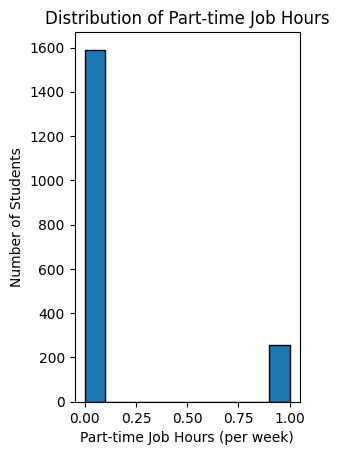

In [75]:
plt.subplot(122)  # Second subplot for part-time job hours
plt.hist(part_time_job, bins=10, edgecolor='black')
plt.xlabel('Part-time Job Hours (per week)')
plt.ylabel('Number of Students')
plt.title('Distribution of Part-time Job Hours')

We can see that around 380 students do have a part time and over 1600 students do not. This is a very small amount of students who do work.

Text(0.5, 1.0, 'Distribution of Part-time Job Hours')

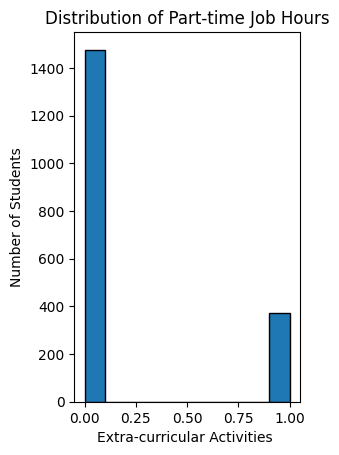

In [76]:
plt.subplot(122)  # Second subplot for part-time job hours
plt.hist(extracurricular_activities, bins=10, edgecolor='black')
plt.xlabel('Extra-curricular Activities ')
plt.ylabel('Number of Students')
plt.title('Distribution of Part-time Job Hours')

Over 400 students do partake in extra curricular acitivies whereas just under 1600 students do not. Only 1/4 of students partcipate in extra curriclar. 

From this all I want to be able to see what factors affect students performance the most especially on the subjects where they dont perform as well. This is what will be index will be on

<h1> Linear regressions </h1>

Now I will be showing all the linear regressions between each variable in the dataset

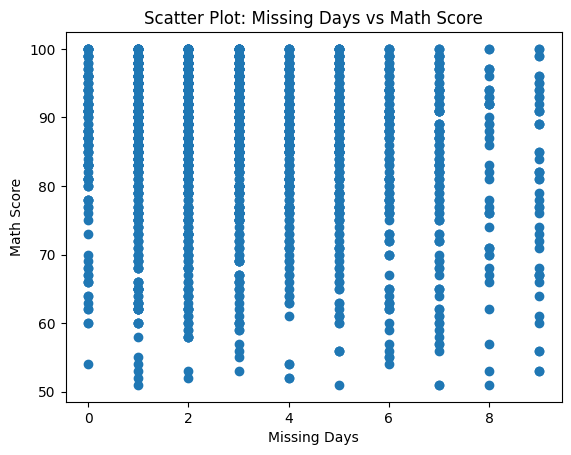

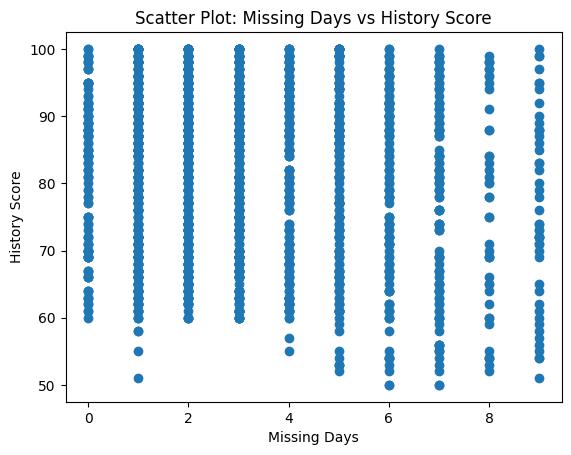

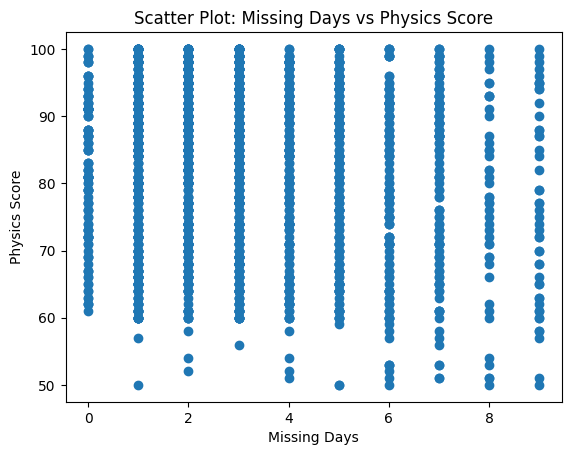

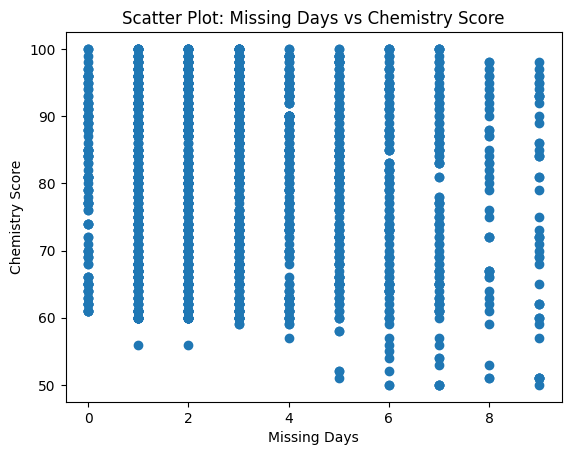

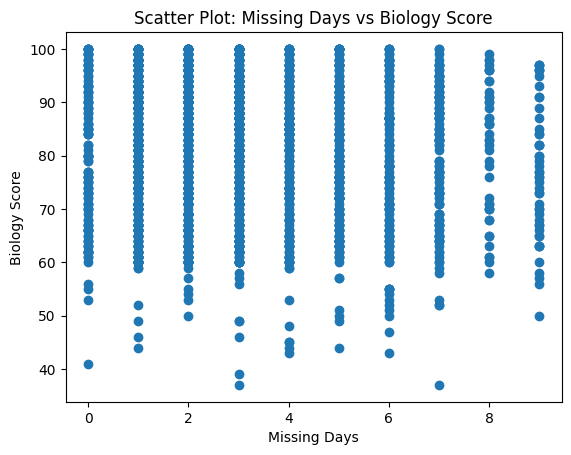

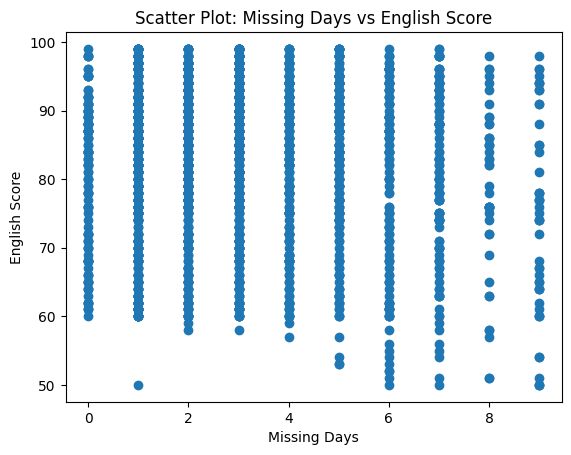

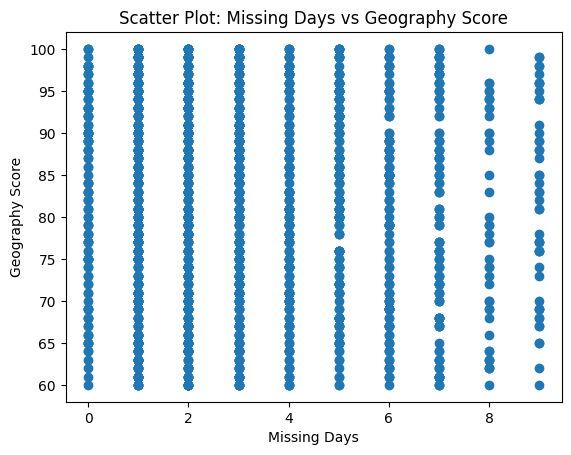

In [77]:

# Scatter plot between missing_days and math_score
plt.scatter(missing_days, math_score)
plt.xlabel('Missing Days')
plt.ylabel('Math Score')
plt.title('Scatter Plot: Missing Days vs Math Score')
plt.show()

# Scatter plot between missing_days and history_score
plt.scatter(missing_days, history_score)
plt.xlabel('Missing Days')
plt.ylabel('History Score')
plt.title('Scatter Plot: Missing Days vs History Score')
plt.show()

# Scatter plot between missing_days and physics_score
plt.scatter(missing_days, physics_score)
plt.xlabel('Missing Days')
plt.ylabel('Physics Score')
plt.title('Scatter Plot: Missing Days vs Physics Score')
plt.show()

# Scatter plot between missing_days and chemistry_score
plt.scatter(missing_days, chemistry_score)
plt.xlabel('Missing Days')
plt.ylabel('Chemistry Score')
plt.title('Scatter Plot: Missing Days vs Chemistry Score')
plt.show()

# Scatter plot between missing_days and biology_score
plt.scatter(missing_days, biology_score)
plt.xlabel('Missing Days')
plt.ylabel('Biology Score')
plt.title('Scatter Plot: Missing Days vs Biology Score')
plt.show()

# Scatter plot between missing_days and english_score
plt.scatter(missing_days, english_score)
plt.xlabel('Missing Days')
plt.ylabel('English Score')
plt.title('Scatter Plot: Missing Days vs English Score')
plt.show()

# Scatter plot between missing_days and geography_score
plt.scatter(missing_days, geography_score)
plt.xlabel('Missing Days')
plt.ylabel('Geography Score')
plt.title('Scatter Plot: Missing Days vs Geography Score')
plt.show()



Above is the relationship between missing days and scores across various subjects. We can see there is no correlation between missing dayds and how well your perform in the subject. As we can see from the graph below the amount of days you miss doesn't directly affect your scores in maths. This is the same for all other subjects. 

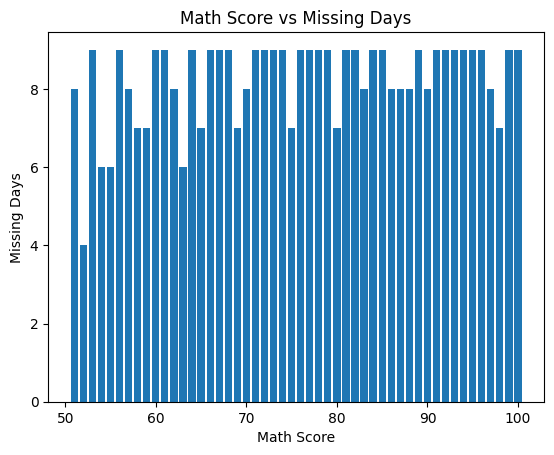

In [78]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.bar(math_score, missing_days)

# Set the labels and title
plt.xlabel('Math Score')
plt.ylabel('Missing Days')
plt.title('Math Score vs Missing Days')

# Show the plot
plt.show()


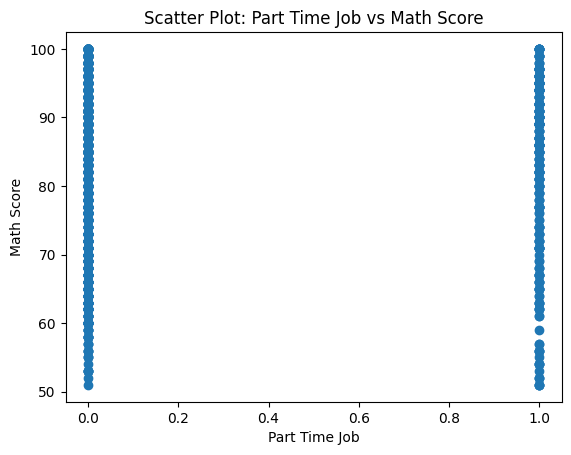

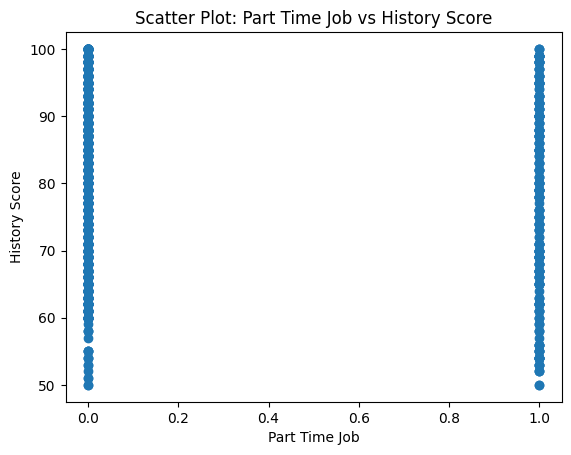

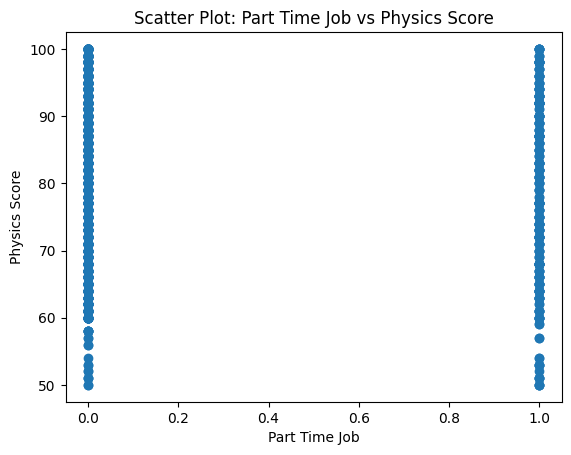

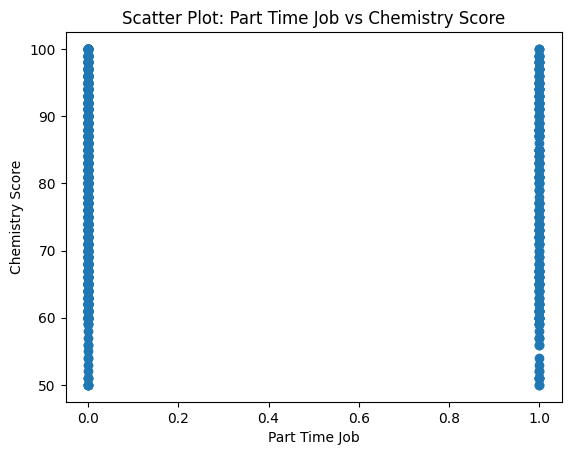

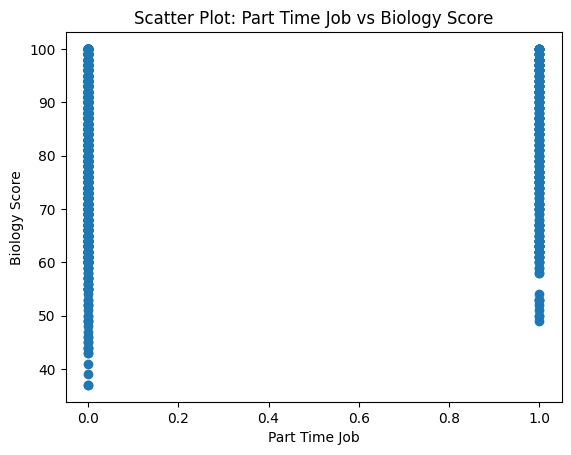

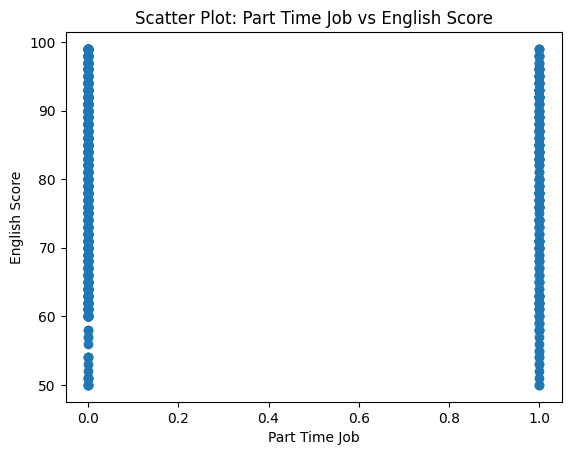

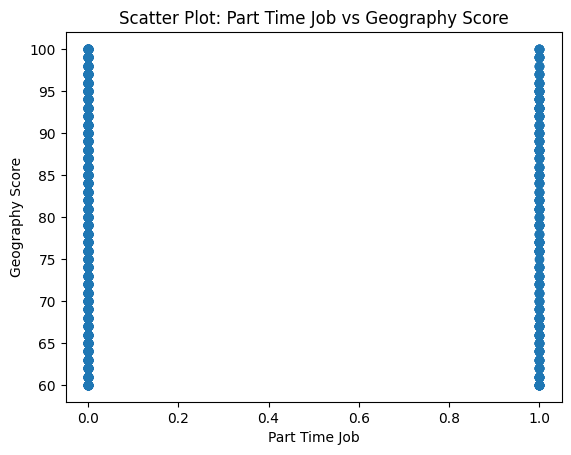

In [79]:


# Scatter plot between part_time_job and math_score
plt.scatter(part_time_job, math_score)
plt.xlabel('Part Time Job')
plt.ylabel('Math Score')
plt.title('Scatter Plot: Part Time Job vs Math Score')
plt.show()

# Scatter plot between part_time_job and history_score
plt.scatter(part_time_job, history_score)
plt.xlabel('Part Time Job')
plt.ylabel('History Score')
plt.title('Scatter Plot: Part Time Job vs History Score')
plt.show()

# Scatter plot between part_time_job and physics_score
plt.scatter(part_time_job, physics_score)
plt.xlabel('Part Time Job')
plt.ylabel('Physics Score')
plt.title('Scatter Plot: Part Time Job vs Physics Score')
plt.show()

# Scatter plot between part_time_job and chemistry_score
plt.scatter(part_time_job, chemistry_score)
plt.xlabel('Part Time Job')
plt.ylabel('Chemistry Score')
plt.title('Scatter Plot: Part Time Job vs Chemistry Score')
plt.show()

# Scatter plot between part_time_job and biology_score
plt.scatter(part_time_job, biology_score)
plt.xlabel('Part Time Job')
plt.ylabel('Biology Score')
plt.title('Scatter Plot: Part Time Job vs Biology Score')
plt.show()

# Scatter plot between part_time_job and english_score
plt.scatter(part_time_job, english_score)
plt.xlabel('Part Time Job')
plt.ylabel('English Score')
plt.title('Scatter Plot: Part Time Job vs English Score')
plt.show()

# Scatter plot between part_time_job and geography_score
plt.scatter(part_time_job, geography_score)
plt.xlabel('Part Time Job')
plt.ylabel('Geography Score')
plt.title('Scatter Plot: Part Time Job vs Geography Score')
plt.show()


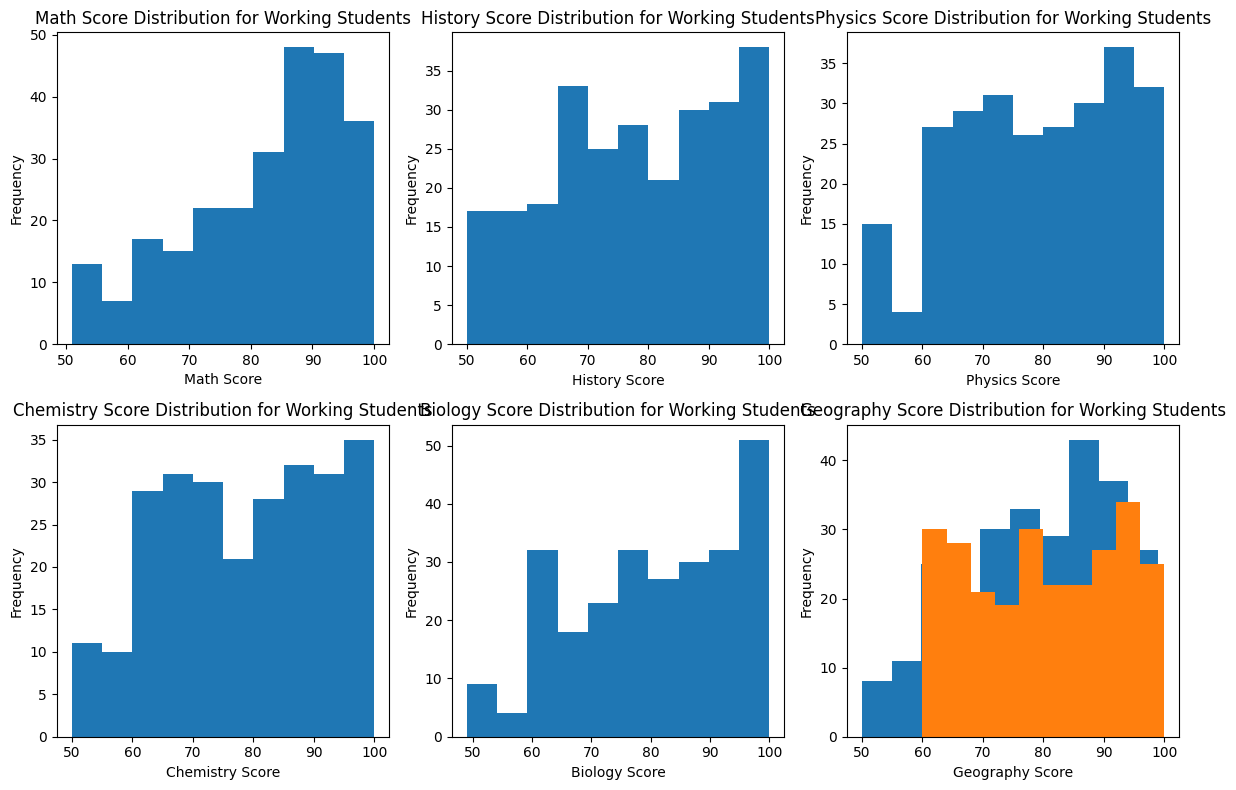

In [80]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only those who work
working_students = df[df['part_time_job_True'] == 1]

# Create a histogram for each subject
plt.figure(figsize=(12, 8))



plt.subplot(231)
plt.hist(working_students['math_score'])
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Math Score Distribution for Working Students')

plt.subplot(232)
plt.hist(working_students['history_score'])
plt.xlabel('History Score')
plt.ylabel('Frequency')
plt.title('History Score Distribution for Working Students')

plt.subplot(233)
plt.hist(working_students['physics_score'])
plt.xlabel('Physics Score')
plt.ylabel('Frequency')
plt.title('Physics Score Distribution for Working Students')

plt.subplot(234)
plt.hist(working_students['chemistry_score'])
plt.xlabel('Chemistry Score')
plt.ylabel('Frequency')
plt.title('Chemistry Score Distribution for Working Students')

plt.subplot(235)
plt.hist(working_students['biology_score'])
plt.xlabel('Biology Score')
plt.ylabel('Frequency')
plt.title('Biology Score Distribution for Working Students')

plt.subplot(236)
plt.hist(working_students['english_score'])
plt.xlabel('English Score')
plt.ylabel('Frequency')
plt.title('English Score Distribution for Working Students')

plt.subplot(236)
plt.hist(working_students['geography_score'])
plt.xlabel('Geography Score')
plt.ylabel('Frequency')
plt.title('Geography Score Distribution for Working Students')

plt.tight_layout()
plt.show()


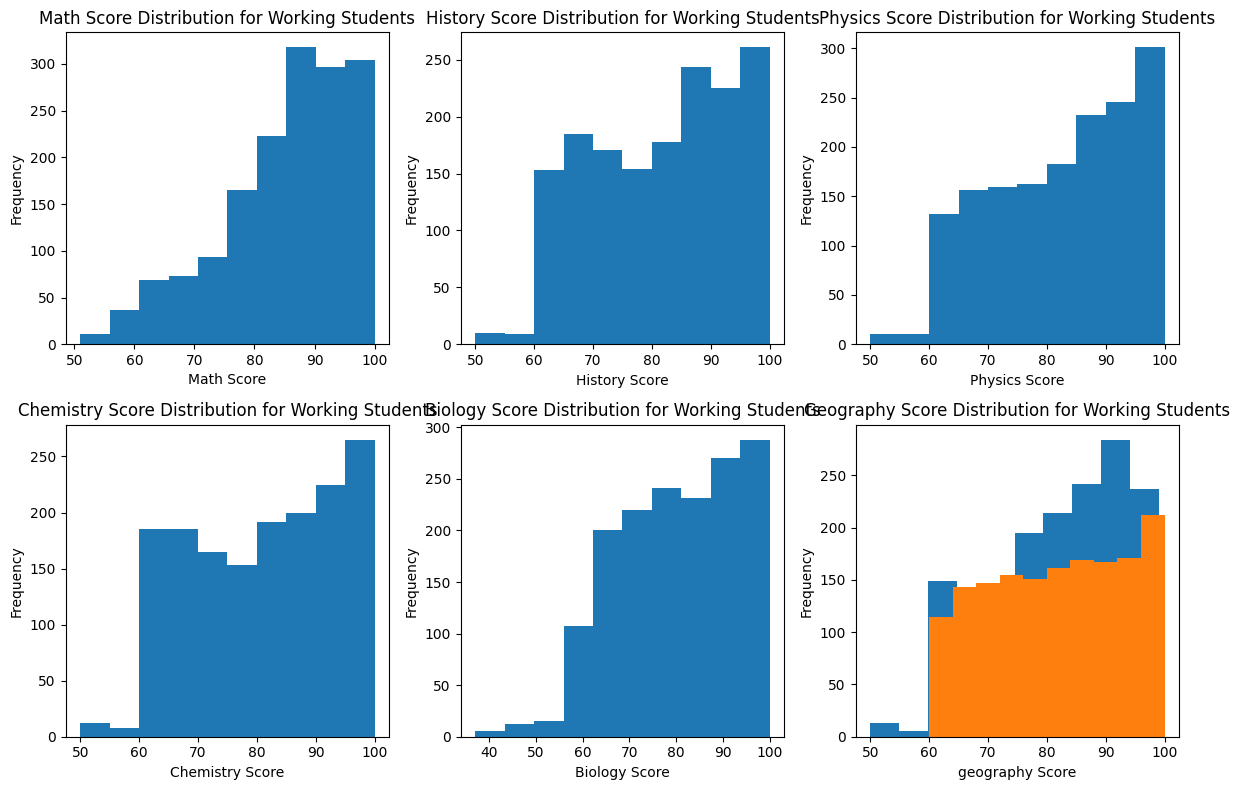

In [87]:

import matplotlib.pyplot as plt



# Filter the dataframe to include only those who work
working_students = df[df['part_time_job_True'] == 0]

# Create a histogram for each subject
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.hist(working_students['math_score'])
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Math Score Distribution for Working Students')

plt.subplot(232)
plt.hist(working_students['history_score'])
plt.xlabel('History Score')
plt.ylabel('Frequency')
plt.title('History Score Distribution for Working Students')

plt.subplot(233)
plt.hist(working_students['physics_score'])
plt.xlabel('Physics Score')
plt.ylabel('Frequency')
plt.title('Physics Score Distribution for Working Students')

plt.subplot(234)
plt.hist(working_students['chemistry_score'])
plt.xlabel('Chemistry Score')
plt.ylabel('Frequency')
plt.title('Chemistry Score Distribution for Working Students')

plt.subplot(235)
plt.hist(working_students['biology_score'])
plt.xlabel('Biology Score')
plt.ylabel('Frequency')
plt.title('Biology Score Distribution for Working Students')

plt.subplot(236)
plt.hist(working_students['english_score'])
plt.xlabel('English Score')
plt.ylabel('Frequency')
plt.title('English Score Distribution for Working Students')

plt.subplot(236)
plt.hist(working_students['geography_score'])
plt.xlabel('geography Score')
plt.ylabel('Frequency')
plt.title('Geography Score Distribution for Working Students')

plt.tight_layout()
plt.show()





Comparing the graphs we can see there is a slight difference between the scores if you work part time rather than if you didn't. However we have to take into account that they both generally perform the same across all subjects. We also have to consider there is around 1/4 of students who actually work and can still maintain main a grade. From this I think having a part time job does not affect these students grades.

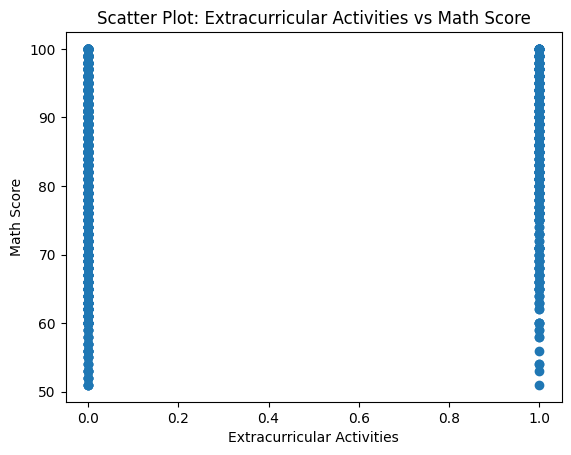

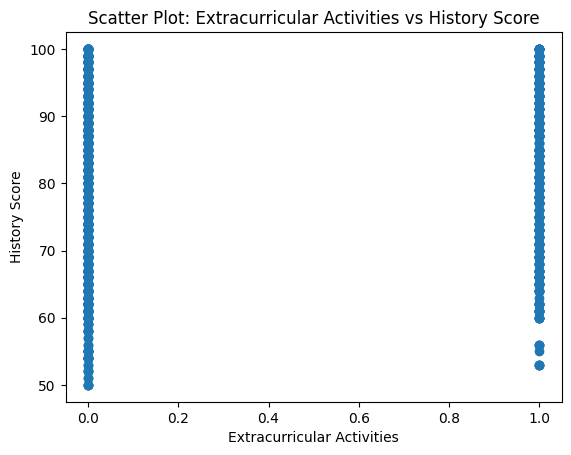

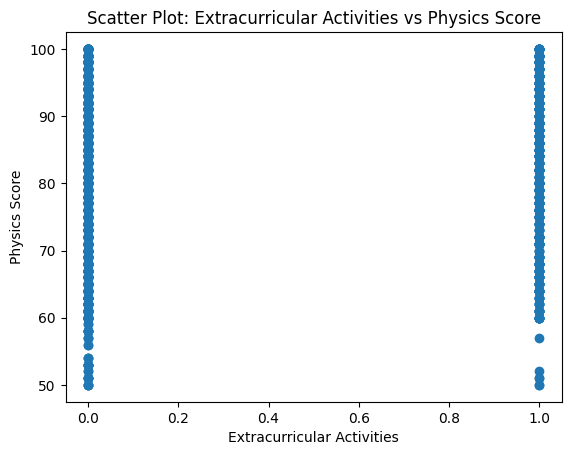

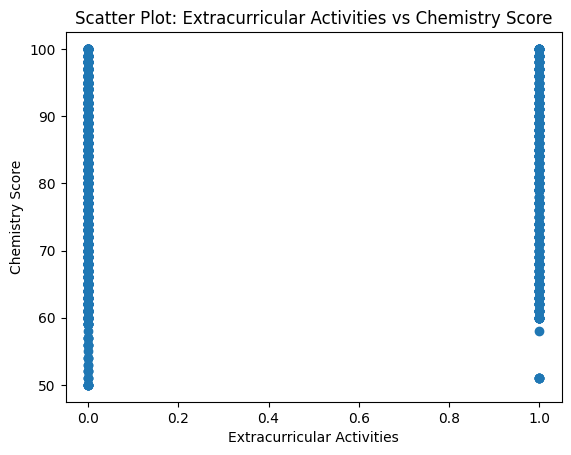

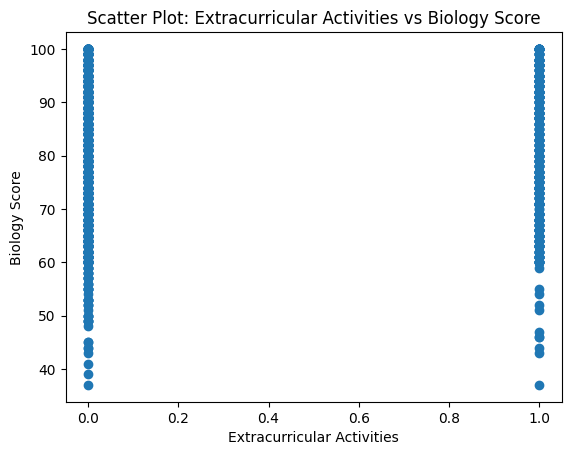

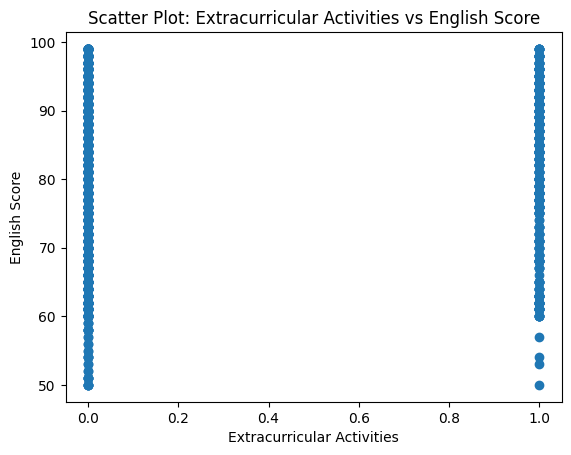

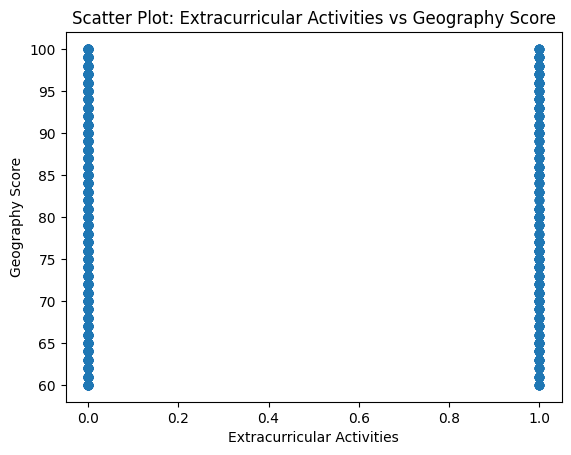

In [82]:

# Scatter plot between extracurricular_activities and math_score
plt.scatter(extracurricular_activities, math_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Math Score')
plt.title('Scatter Plot: Extracurricular Activities vs Math Score')
plt.show()

# Scatter plot between extracurricular_activities and history_score
plt.scatter(extracurricular_activities, history_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('History Score')
plt.title('Scatter Plot: Extracurricular Activities vs History Score')
plt.show()

# Scatter plot between extracurricular_activities and physics_score
plt.scatter(extracurricular_activities, physics_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Physics Score')
plt.title('Scatter Plot: Extracurricular Activities vs Physics Score')
plt.show()

# Scatter plot between extracurricular_activities and chemistry_score
plt.scatter(extracurricular_activities, chemistry_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Chemistry Score')
plt.title('Scatter Plot: Extracurricular Activities vs Chemistry Score')
plt.show()

# Scatter plot between extracurricular_activities and biology_score
plt.scatter(extracurricular_activities, biology_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Biology Score')
plt.title('Scatter Plot: Extracurricular Activities vs Biology Score')
plt.show()

# Scatter plot between extracurricular_activities and english_score
plt.scatter(extracurricular_activities, english_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('English Score')
plt.title('Scatter Plot: Extracurricular Activities vs English Score')
plt.show()

# Scatter plot between extracurricular_activities and geography_score
plt.scatter(extracurricular_activities, geography_score)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Geography Score')
plt.title('Scatter Plot: Extracurricular Activities vs Geography Score')
plt.show()

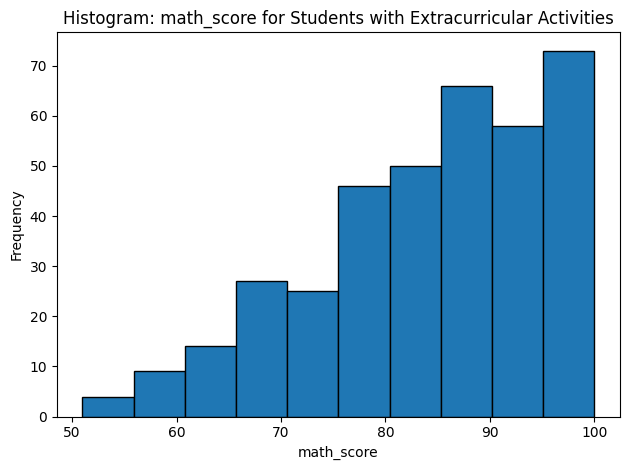

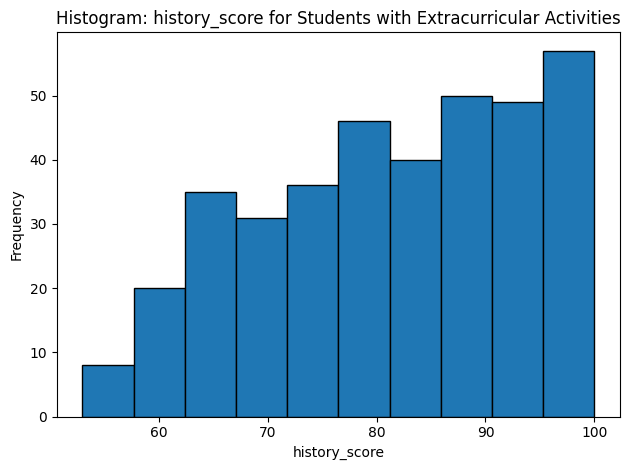

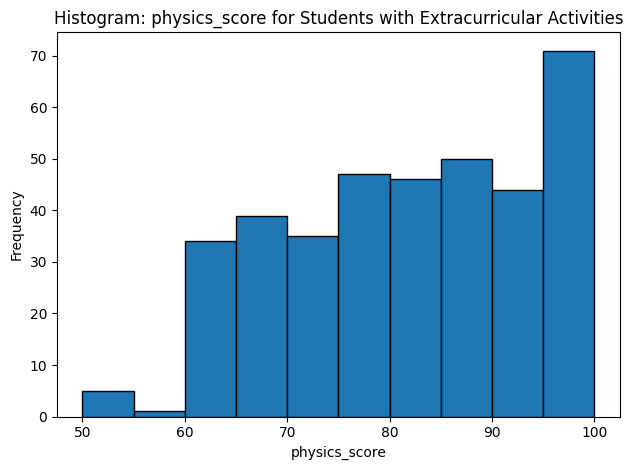

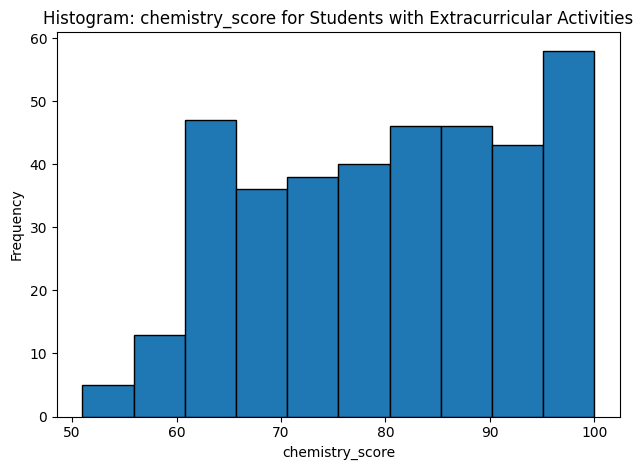

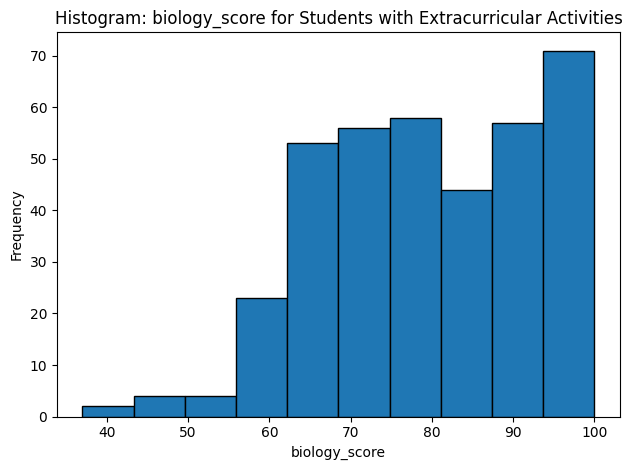

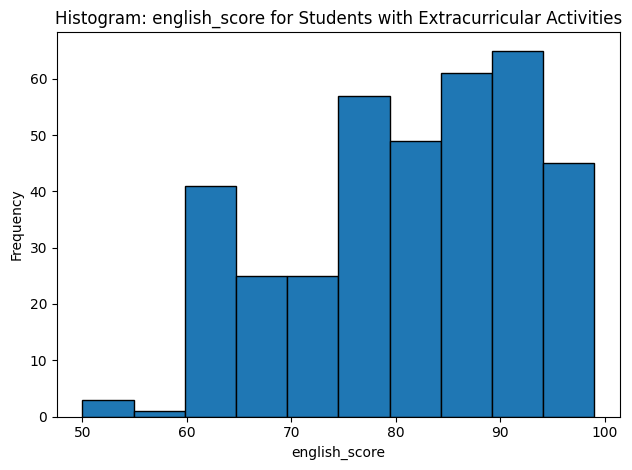

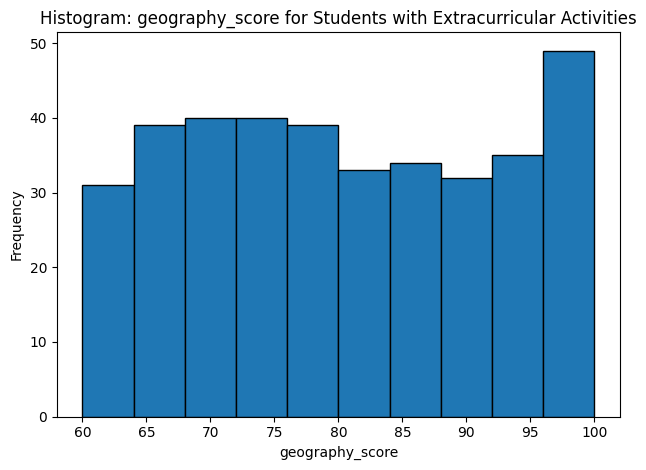

In [83]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only students who partake in extracurricular activities
extracurricular_students = df[df['extracurricular_activities_True'] == 1]

# Create a histogram for each subject
subjects = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']
for subject in subjects:
    plt.hist(extracurricular_students[subject], bins=10, edgecolor='black')
    plt.xlabel(subject)
    plt.ylabel('Frequency')
    plt.title(f'Histogram: {subject} for Students with Extracurricular Activities')
    plt.tight_layout()
    plt.show()


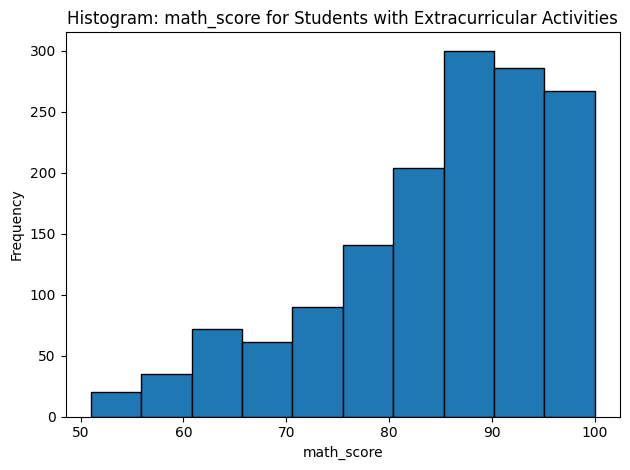

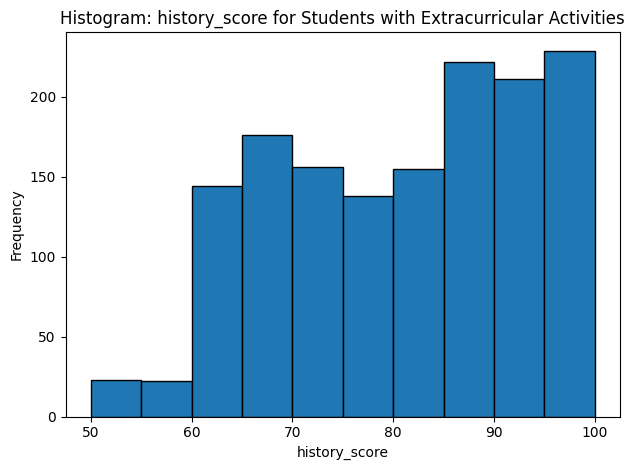

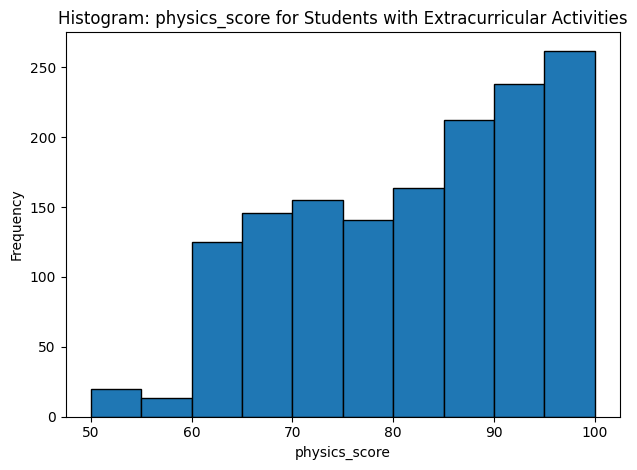

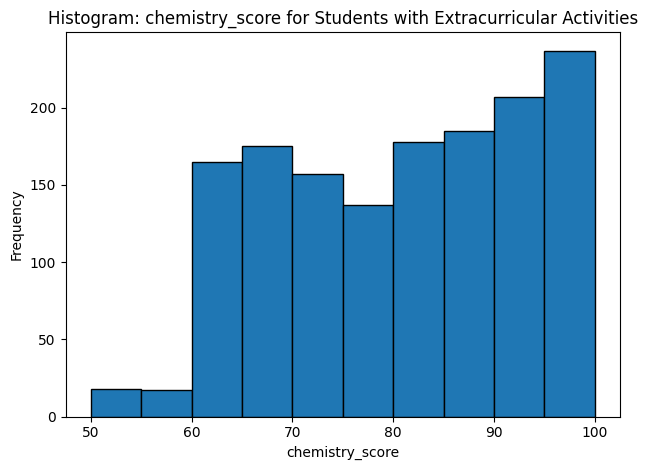

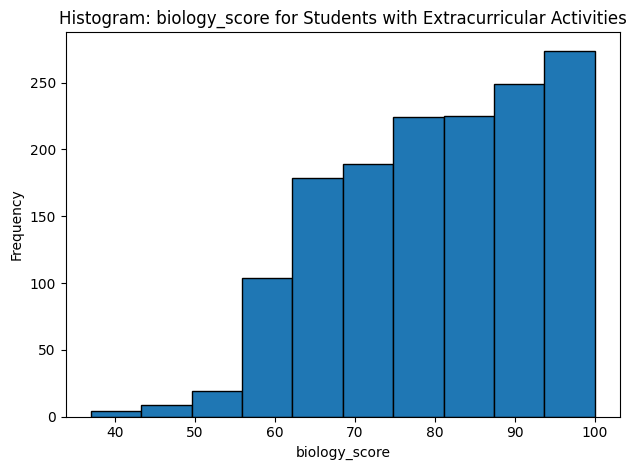

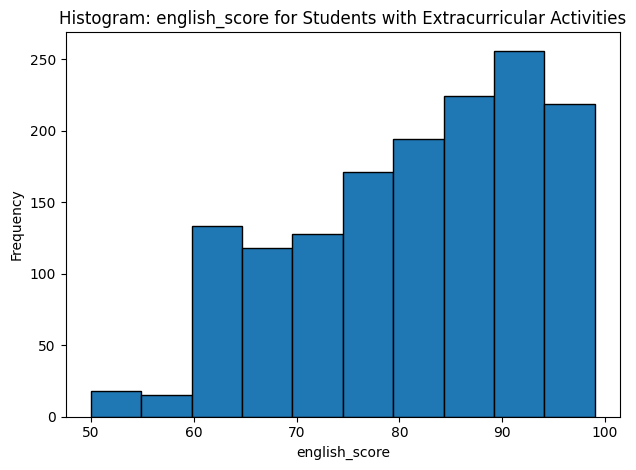

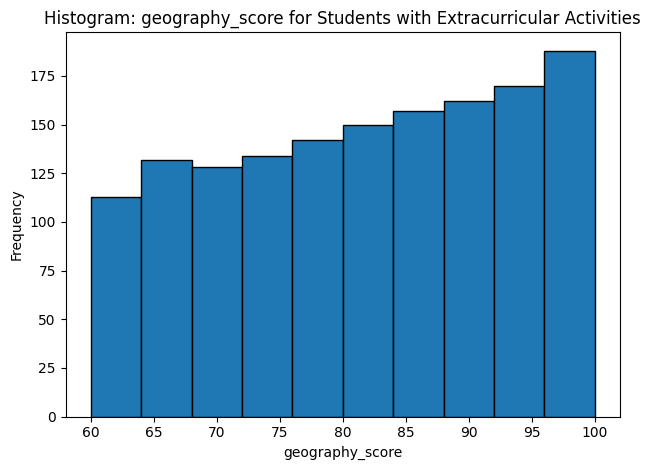

In [84]:
import matplotlib.pyplot as plt

# Filter the dataframe to include only students who partake in extracurricular activities
extracurricular_students = df[df['extracurricular_activities_True'] == 0]

# Create a histogram for each subject
subjects = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']
for subject in subjects:
    plt.hist(extracurricular_students[subject], bins=10, edgecolor='black')
    plt.xlabel(subject)
    plt.ylabel('Frequency')
    plt.title(f'Histogram: {subject} for Students with Extracurricular Activities')
    plt.tight_layout()
    plt.show()

This is the same result there seems to be no affect between if you have an extra curricular activity than if you dont. Across in all subjects those who did and didn't have one performed the same.

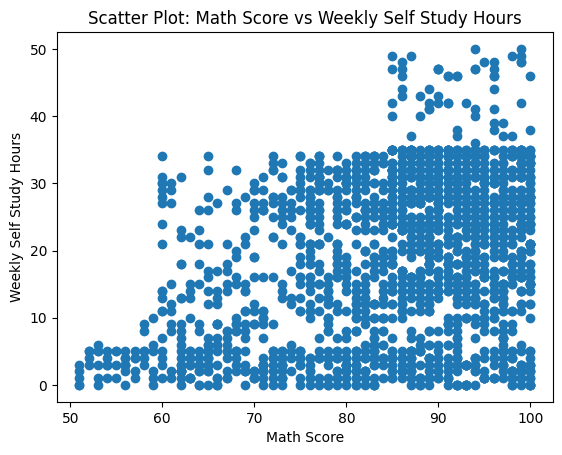

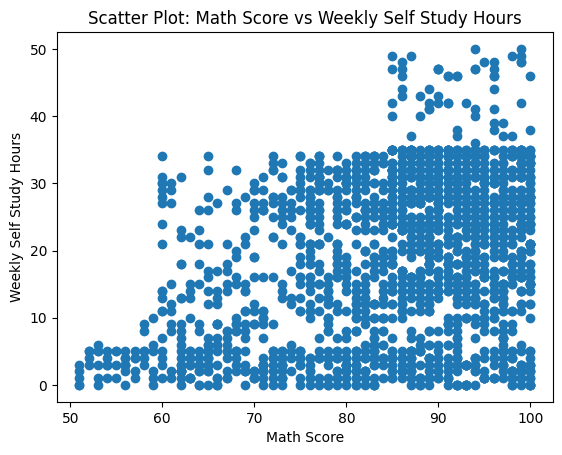

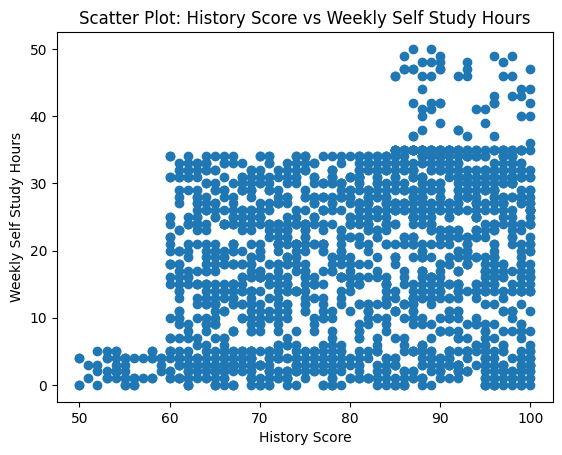

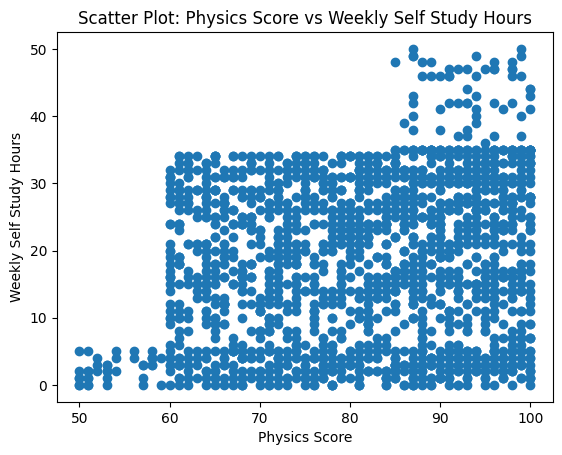

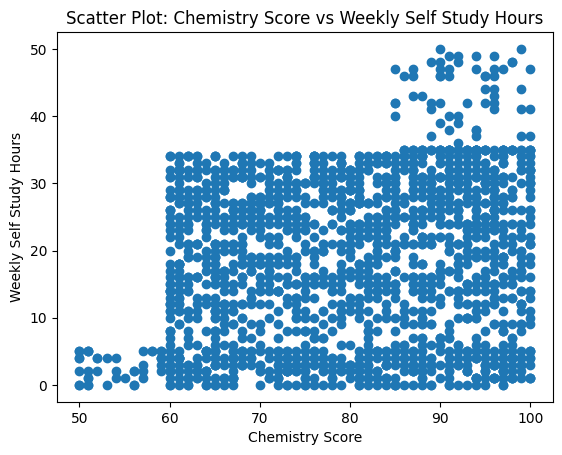

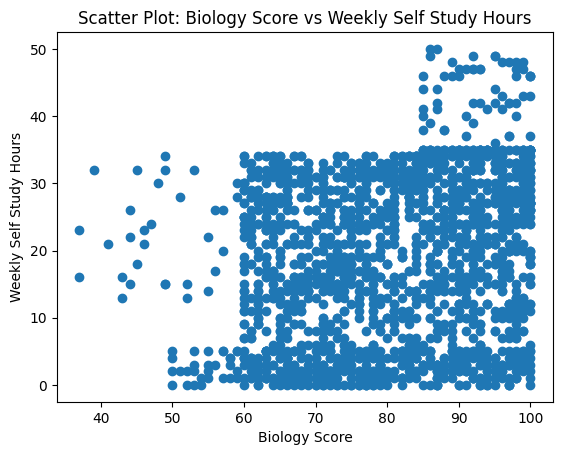

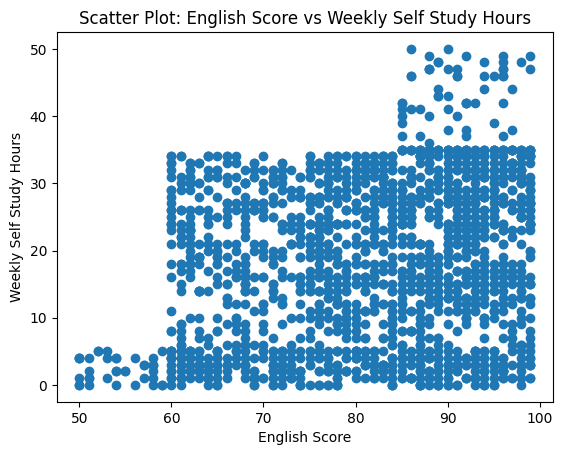

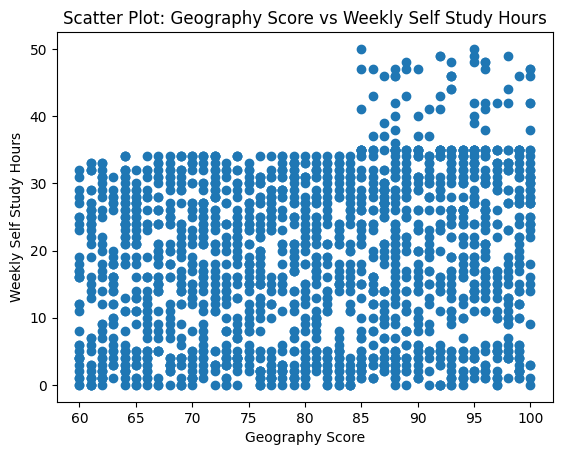

In [88]:
# Scatter plot for math_score
plt.scatter(math_score, weekly_self_study_hours)
plt.xlabel('Math Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: Math Score vs Weekly Self Study Hours')
plt.show()



# Scatter plot for math_score
plt.scatter(math_score, weekly_self_study_hours)
plt.xlabel('Math Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: Math Score vs Weekly Self Study Hours')
plt.show()

# Scatter plot for history_score
plt.scatter(history_score, weekly_self_study_hours)
plt.xlabel('History Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: History Score vs Weekly Self Study Hours')
plt.show()

# Scatter plot for physics_score
plt.scatter(physics_score, weekly_self_study_hours)
plt.xlabel('Physics Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: Physics Score vs Weekly Self Study Hours')
plt.show()

# Scatter plot for chemistry_score
plt.scatter(chemistry_score, weekly_self_study_hours)
plt.xlabel('Chemistry Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: Chemistry Score vs Weekly Self Study Hours')
plt.show()

# Scatter plot for biology_score
plt.scatter(biology_score, weekly_self_study_hours)
plt.xlabel('Biology Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: Biology Score vs Weekly Self Study Hours')
plt.show()

# Scatter plot for english_score
plt.scatter(english_score, weekly_self_study_hours)
plt.xlabel('English Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: English Score vs Weekly Self Study Hours')
plt.show()

# Scatter plot for geography_score
plt.scatter(geography_score, weekly_self_study_hours)
plt.xlabel('Geography Score')
plt.ylabel('Weekly Self Study Hours')
plt.title('Scatter Plot: Geography Score vs Weekly Self Study Hours')
plt.show()



* Maths score and study hours:
    There's a slight upward trend in the data points, suggesting that as the number of study hours increases, the math scores tend to increase as well.
    The data points are scattered around the trendline, meaning the correlation is not very strong. There are many students who studied for a similar amount of time but got different scores, and vice versa.
* History score and study hours:
    The data points show a scattered pattern, with no clear upward or downward trend. This suggests a weak correlation between history scores and study hours.
 * Physcis and chemsitry score and study hours:
    The data points show a somewhat upward trend, with a spread of scores around the line. This suggests a positive correlation between physics and chemsitry scores and study hours. In other words, there's a tendency for students who study physics and chemistry for more hours to score higher on exams, compared to students who study for fewer hours.  But it's not an extremely strong correlation.
* Biology score and study hours:
    The data points show a scattered pattern, with no clear upward or downward trend. This suggests a weak correlation between biology scores and study hours.
* English score and study hours:
    The data points show a scattered pattern, with no clear upward or downward trend. This suggests a weak correlation between english scores and study hours.
* Geography score and study hours:
    The data points show a scattered pattern, with no clear upward or downward trend. This suggests a weak correlation between geography scores and study hours.

Overall, the data suggests that there is a weak to moderate positive correlation between study hours and math, physics, and chemistry scores. However, there is no clear correlation between study hours and history, biology, english, and geography scores.


<h1>IV TO IV</h1>

In [89]:
from scipy.stats import pearsonr

# Pearson correlation between part_time_job and weekly_self_study_hours
corr_part_time_job_weekly_self_study, _ = pearsonr(part_time_job, weekly_self_study_hours)
print(f"Pearson correlation between part_time_job and weekly_self_study_hours: {corr_part_time_job_weekly_self_study}")

# Pearson correlation between extracurricular_activities and weekly_self_study_hours
corr_extracurricular_weekly_self_study, _ = pearsonr(extracurricular_activities, weekly_self_study_hours)
print(f"Pearson correlation between extracurricular_activities and weekly_self_study_hours: {corr_extracurricular_weekly_self_study}")

# Pearson correlation between missing_days and weekly_self_study_hours
corr_missing_days_weekly_self_study, _ = pearsonr(missing_days, weekly_self_study_hours)
print(f"Pearson correlation between missing_days and weekly_self_study_hours: {corr_missing_days_weekly_self_study}")

# Pearson correlation between part_time_job and missing_days
corr_part_time_job_missing_days, _ = pearsonr(part_time_job, missing_days)
print(f"Pearson correlation between part_time_job and missing_days: {corr_part_time_job_missing_days}")

# Pearson correlation between extracurricular_activities and missing_days
corr_extracurricular_missing_days, _ = pearsonr(extracurricular_activities, missing_days)
print(f"Pearson correlation between extracurricular_activities and missing_days: {corr_extracurricular_missing_days}")

# Pearson correlation between part_time_job and extracurricular_activities
corr_part_time_job_extracurricular, _ = pearsonr(part_time_job, extracurricular_activities)
print(f"Pearson correlation between part_time_job and extracurricular_activities: {corr_part_time_job_extracurricular}")



Pearson correlation between part_time_job and weekly_self_study_hours: -0.16885529258153167
Pearson correlation between extracurricular_activities and weekly_self_study_hours: -0.04015895920302186
Pearson correlation between missing_days and weekly_self_study_hours: -0.19510686190839924
Pearson correlation between part_time_job and missing_days: 0.149562109288942
Pearson correlation between extracurricular_activities and missing_days: 0.021414712502199815
Pearson correlation between part_time_job and extracurricular_activities: -0.011428694322935817


Based on these correlations, there doesn't seem to be any strong multicollinearity between the independent variables. Multicollinearity is typically considered problematic if the correlation coefficient between two independent variables is greater than 0.7 or -0.7.

 The highest correlation coefficient between any pair of independent variables is 0.1951 (between missing_days and weekly_self_study_hours), which is below the threshold commonly used to identify multicollinearity.

<h1>IV TO DV</h1>

In [91]:


# Pearson correlation between gender and math_score
corr_missing_days_math, _ = pearsonr(missing_days, math_score)
print(f"Pearson correlation between missing days and math_score: {corr_missing_days_math}")

# Pearson correlation between gender and history_score
corr_missing_days_history, _ = pearsonr(missing_days, history_score)
print(f"Pearson correlation between missing days and history_score: {corr_missing_days_history}")

# Pearson correlation between gender and physics_score
corr_missing_days_physics, _ = pearsonr(missing_days, physics_score)
print(f"Pearson correlation between missing days and physics_score: {corr_missing_days_physics}")

# Pearson correlation between gender and chemistry_score
corr_missing_days_chemsitry, _ = pearsonr(missing_days, chemistry_score)
print(f"Pearson correlation between missing days and chemistry_score: {corr_missing_days_chemsitry}")

# Pearson correlation between gender and biology_score
corr_missing_days_biology, _ = pearsonr(missing_days, biology_score)
print(f"Pearson correlation between missing days and biology_score: {corr_missing_days_biology}")

# Pearson correlation between gender and english_score
corr_missing_days_english, _ = pearsonr(missing_days, english_score)
print(f"Pearson correlation between missing days and english_score: {corr_missing_days_english}")

# Pearson correlation between gender and geography_score
corr_missing_days_geography, _ = pearsonr(missing_days, geography_score)
print(f"Pearson correlation between missing days and geography_score: {corr_missing_days_geography}")

# Pearson correlation between part_time_job and math_score
corr_part_time_job_math, _ = pearsonr(part_time_job, math_score)
print(f"Pearson correlation between part_time_job and math_score: {corr_part_time_job_math}")

# Pearson correlation between part_time_job and history_score
corr_part_time_job_history, _ = pearsonr(part_time_job, history_score)
print(f"Pearson correlation between part_time_job and history_score: {corr_part_time_job_history}")

# Pearson correlation between part_time_job and physics_score
corr_part_time_job_physics, _ = pearsonr(part_time_job, physics_score)
print(f"Pearson correlation between part_time_job and physics_score: {corr_part_time_job_physics}")

# Pearson correlation between part_time_job and chemistry_score
corr_part_time_job_chemistry, _ = pearsonr(part_time_job, chemistry_score)
print(f"Pearson correlation between part_time_job and chemistry_score: {corr_part_time_job_chemistry}")

# Pearson correlation between part_time_job and biology_score
corr_part_time_job_biology, _ = pearsonr(part_time_job, biology_score)
print(f"Pearson correlation between part_time_job and biology_score: {corr_part_time_job_biology}")

# Pearson correlation between part_time_job and english_score
corr_part_time_job_english, _ = pearsonr(part_time_job, english_score)
print(f"Pearson correlation between part_time_job and english_score: {corr_part_time_job_english}")

# Pearson correlation between part_time_job and geography_score
corr_part_time_job_geography, _ = pearsonr(part_time_job, geography_score)
print(f"Pearson correlation between part_time_job and geography_score: {corr_part_time_job_geography}")

# Pearson correlation between extracurricular_activities and math_score
corr_extracurricular_math, _ = pearsonr(extracurricular_activities, math_score)
print(f"Pearson correlation between extracurricular_activities and math_score: {corr_extracurricular_math}")

# Pearson correlation between extracurricular_activities and history_score
corr_extracurricular_history, _ = pearsonr(extracurricular_activities, history_score)
print(f"Pearson correlation between extracurricular_activities and history_score: {corr_extracurricular_history}")

# Pearson correlation between extracurricular_activities and physics_score
corr_extracurricular_physics, _ = pearsonr(extracurricular_activities, physics_score)
print(f"Pearson correlation between extracurricular_activities and physics_score: {corr_extracurricular_physics}")

# Pearson correlation between extracurricular_activities and chemistry_score
corr_extracurricular_chemistry, _ = pearsonr(extracurricular_activities, chemistry_score)
print(f"Pearson correlation between extracurricular_activities and chemistry_score: {corr_extracurricular_chemistry}")

# Pearson correlation between extracurricular_activities and biology_score
corr_extracurricular_biology, _ = pearsonr(extracurricular_activities, biology_score)
print(f"Pearson correlation between extracurricular_activities and biology_score: {corr_extracurricular_biology}")

# Pearson correlation between extracurricular_activities and english_score
corr_extracurricular_english, _ = pearsonr(extracurricular_activities, english_score)
print(f"Pearson correlation between extracurricular_activities and english_score: {corr_extracurricular_english}")

# Pearson correlation between extracurricular_activities and geography_score
corr_extracurricular_geography, _ = pearsonr(extracurricular_activities, geography_score)
print(f"Pearson correlation between extracurricular_activities and geography_score: {corr_extracurricular_geography}")

# Pearson correlation between weekly_self_study_hours and math_score
corr_weekly_self_study_math, _ = pearsonr(weekly_self_study_hours, math_score)
print(f"Pearson correlation between weekly_self_study_hours and math_score: {corr_weekly_self_study_math}")

# Pearson correlation between weekly_self_study_hours and history_score
corr_weekly_self_study_history, _ = pearsonr(weekly_self_study_hours, history_score)
print(f"Pearson correlation between weekly_self_study_hours and history_score: {corr_weekly_self_study_history}")

# Pearson correlation between weekly_self_study_hours and physics_score
corr_weekly_self_study_physics, _ = pearsonr(weekly_self_study_hours, physics_score)
print(f"Pearson correlation between weekly_self_study_hours and physics_score: {corr_weekly_self_study_physics}")

# Pearson correlation between weekly_self_study_hours and chemistry_score
corr_weekly_self_study_chemistry, _ = pearsonr(weekly_self_study_hours, chemistry_score)
print(f"Pearson correlation between weekly_self_study_hours and chemistry_score: {corr_weekly_self_study_chemistry}")

# Pearson correlation between weekly_self_study_hours and biology_score
corr_weekly_self_study_biology, _ = pearsonr(weekly_self_study_hours, biology_score)
print(f"Pearson correlation between weekly_self_study_hours and biology_score: {corr_weekly_self_study_biology}")

# Pearson correlation between weekly_self_study_hours and english_score
corr_weekly_self_study_english, _ = pearsonr(weekly_self_study_hours, english_score)
print(f"Pearson correlation between weekly_self_study_hours and english_score: {corr_weekly_self_study_english}")

# Pearson correlation between weekly_self_study_hours and geography_score
corr_weekly_self_study_geography, _ = pearsonr(weekly_self_study_hours, geography_score)
print(f"Pearson correlation between weekly_self_study_hours and geography_score: {corr_weekly_self_study_geography}")

Pearson correlation between missing days and math_score: -0.08910934594455204
Pearson correlation between missing days and history_score: -0.1009724149007267
Pearson correlation between missing days and physics_score: -0.1049998249504058
Pearson correlation between missing days and chemistry_score: -0.062304134325492574
Pearson correlation between missing days and biology_score: -0.05516103206887057
Pearson correlation between missing days and english_score: -0.07375546987970548
Pearson correlation between missing days and geography_score: -0.01562613419871857
Pearson correlation between part_time_job and math_score: -0.09913120974992287
Pearson correlation between part_time_job and history_score: -0.10386265454057367
Pearson correlation between part_time_job and physics_score: -0.10934901973334751
Pearson correlation between part_time_job and chemistry_score: -0.07441472801096082
Pearson correlation between part_time_job and biology_score: 0.004670433566569738
Pearson correlation betw

* Missing Days:
Negative correlations with all subject scores, ranging from -0.0156 to -0.1050.
Higher missing days are associated with lower subject scores across all subjects, indicating that students with more absences tend to have lower scores.

* Part-Time Job:
Negative correlations with most subject scores, ranging from -0.1093 to 0.0047.
Having a part-time job is generally associated with slightly lower subject scores, except for biology where the correlation is close to zero.

* Extracurricular Activities:
Weak correlations with subject scores, mostly close to zero.
There is little to no linear relationship between participation in extracurricular activities and subject scores.

* Weekly Self-Study Hours:
Positive correlations with all subject scores, ranging from 0.1680 to 0.3154 are weak correlation.
Thus I feel the more you study has no effect on the performance of students grades

<h1>Variables to consider for model </h1>

Mostly, the variables are insignificant when it comes to affecting students performance.

However there is a moderate correlation between math_score and weekly_self_study_hours. So I will see model score.

In [93]:
#modeling bivariate relationships
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
weekly_self_study_hours_arr = np.array(weekly_self_study_hours).reshape(-1,1)
model.fit(weekly_self_study_hours_arr, math_score)
r_sq= model.score(weekly_self_study_hours_arr, math_score)
print(r_sq)


0.09947491172049461


In [96]:
import statsmodels.api as sm

model_weekly_self_study_hours = sm.add_constant(weekly_self_study_hours)
model =sm.OLS(math_score, model_weekly_self_study_hours)
result=model.fit()
print(result.summary())
#line below is for the standard error
print("Standard Error: ")
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     203.9
Date:                Sat, 04 May 2024   Prob (F-statistic):           5.85e-44
Time:                        18:45:23   Log-Likelihood:                -7001.4
No. Observations:                1848   AIC:                         1.401e+04
Df Residuals:                    1846   BIC:                         1.402e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.3455      0.463    171.537      0.0

* R-squared (R²):
R-squared measures the proportion of the variance in the dependent variable (math scores, in this case) that is explained by the independent variables in the model.
In this model, R-squared is 0.099, indicating that approximately 9.9% of the variability in math scores can be explained by the independent variables included in the model.
A low R-squared value suggests that the model does not explain much of the variability in the dependent variable.

* F-statistic and Prob (F-statistic):
A low probability (Prob) associated with the F-statistic (e.g., < 0.05) indicates that the model as a whole is statistically significant.
In this case, the probability associated with the F-statistic is very low (5.85e-44), indicating that the model is statistically significant.

* AIC and BIC:
In this case, both AIC and BIC values are relatively high, which might suggest that the model does not fit the data well compared to other potential models.

* The p-value for x1 is very small (0.000), indicating that the coefficient is statistically significant. This suggests that the effect of x1 on the math score is unlikely to be due to random chance alone.

* Intercept (const): The intercept is 79.3455. This means that when all independent variables are zero, the predicted math score is 79.3455.

* Coefficient for the Independent Variable (x1): The coefficient for x1 is 0.2989. This indicates that for every one-unit increase in x1 (the independent variable), the math score is expected to increase by 0.2989 units, holding all other variables constant.





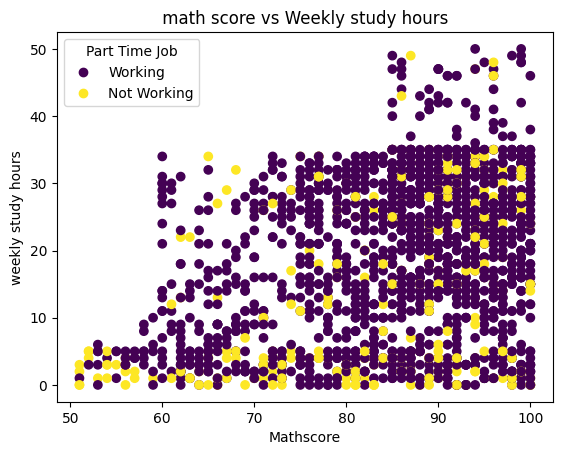

In [97]:
names = ["Working", "Not Working"]
plt.title(" math score vs Weekly study hours ")
plt.xlabel("Mathscore")
plt.ylabel("weekly study hours")
scatter = plt.scatter( math_score,weekly_self_study_hours, c= part_time_job, cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=names,title="Part Time Job")
#plt.show()

From this we can see there is no correlation between if you work with mathscore and weekly study hours showing that working doesnt affect the amount of hours you study and it doesn't 
affect the maths score.

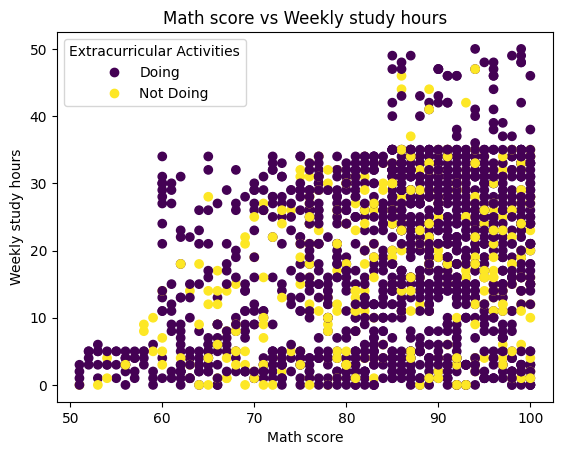

In [98]:
names = ["Doing", "Not Doing"]
plt.title("Math score vs Weekly study hours")
plt.xlabel("Math score")
plt.ylabel("Weekly study hours")
scatter = plt.scatter(math_score, weekly_self_study_hours, c=extracurricular_activities, cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0], labels=names, title="Extracurricular Activities")
#plt.show()

From this we can see there is no correlation between if you participate in extra  with mathscore and weekly study hours showing that partcipating doesnt affect the amount of hours you study and it doesn't affect the maths score.

In [100]:
import statsmodels.api as sm

X = df[['weekly_self_study_hours', 'part_time_job_True']]
X = sm.add_constant(X)
y = df['math_score']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             math_score   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     104.4
Date:                Sat, 04 May 2024   Prob (F-statistic):           1.14e-43
Time:                        18:55:45   Log-Likelihood:                -6999.2
No. Observations:                1848   AIC:                         1.400e+04
Df Residuals:                    1845   BIC:                         1.402e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

* R-squared: The R-squared value is 0.102, indicating that approximately 10.2% of the variability in math scores is explained by the independent variables included in the model.

* Adjusted R-squared: The adjusted R-squared is similar to the R-squared value and is adjusted for the number of predictors in the model. It is 0.101 in this case.

* F-statistic and Prob (F-statistic): The F-statistic tests the overall significance of the model. The associated p-value (Prob (F-statistic)) is very low (1.14e-43), indicating that the model as a whole is statistically significant.

Overall, both weekly self-study hours and part-time job status are statistically significant predictors of math scores, as their coefficients have p-values less than 0.05. The intercept term is also statistically significant. The confidence intervals provide a range of plausible values for the coefficients, and the t-values indicate the significance of each coefficient relative to its standard error.



In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['weekly_self_study_hours', 'part_time_job_True', 'extracurricular_activities_True']]
y = df['math_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict math scores on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 120.41444744021852


<h1>Conclusion of MultiLinear regression</h1>

* Lack of correlation between all variables
* Math score is somewhat affected by part time work and weekly study hours due to its significant F statistic
* Overall I feel multi linear regression is not the fit for my dataset as it doesn't explain if variables are affected by each other majorly.
* MSE is very high -> these variables do not predict maths
* Scores cannot be predicted 





<h1>PCA</h1>



In [101]:
# Standardize the variables
math_score_scaled = StandardScaler().fit_transform(df['math_score'].values.reshape(-1, 1))
history_score_scaled = StandardScaler().fit_transform(df['history_score'].values.reshape(-1, 1))
physics_score_scaled = StandardScaler().fit_transform(df['physics_score'].values.reshape(-1, 1))
chemistry_score_scaled = StandardScaler().fit_transform(df['chemistry_score'].values.reshape(-1, 1))
biology_score_scaled = StandardScaler().fit_transform(df['biology_score'].values.reshape(-1, 1))
english_score_scaled = StandardScaler().fit_transform(df['english_score'].values.reshape(-1, 1))
geography_score_scaled = StandardScaler().fit_transform(df['geography_score'].values.reshape(-1, 1))

data = df[['part_time_job_True', 'weekly_self_study_hours', 'absence_days', 'extracurricular_activities_True',
                'math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score',
                'geography_score']]
column_names = np.array(data.columns)

In [107]:
# Standardize the variables
from sklearn import preprocessing
scaled_data = preprocessing.scale(data.T)


In [108]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
print(per_var)

[94.1  1.   0.9  0.9  0.8  0.8  0.8  0.6  0.   0.   0. ]


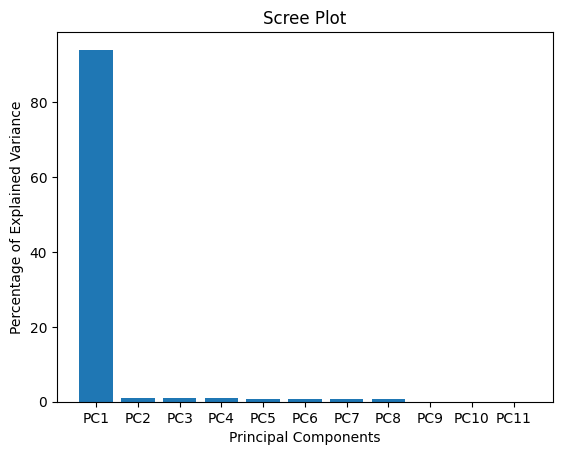

In [109]:
loading_scores = pca.components_.T * np.sqrt(pca.explained_variance_)

#plotting scree plot
labels=['PC'+str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title('Scree Plot')
plt.show()


In [110]:

loading_scores = pd.Series(loading_scores[0], index=column_names)
print(loading_scores)

part_time_job_True                -1.016092e+00
weekly_self_study_hours           -1.240431e-03
absence_days                       1.882242e-01
extracurricular_activities_True    4.210695e-02
math_score                         5.179692e-02
history_score                     -5.571826e-02
physics_score                     -8.811910e-02
chemistry_score                    1.295874e-01
biology_score                      2.874405e-03
english_score                      9.405044e-04
geography_score                   -2.432240e-15
dtype: float64


* Part-Time Job (True):
    Loading Score: -1.016092e+00
    Interpretation: This indicates a moderately strong negative correlation between having a part-time job and the corresponding principal component. It suggests that having a part-time job contributes negatively to the principal component.
* Weekly Self-Study Hours:
    Loading Score: -1.240431e-03
    Interpretation: This indicates a very weak negative correlation between weekly self-study hours and the corresponding principal component. It suggests that weekly self-study hours have a minimal impact on the principal component.
* Absence Days:
    Loading Score: 1.882242e-01
    Interpretation: This indicates a moderate positive correlation between absence days and the corresponding principal component. It suggests that absence days positively contribute to the principal component.
* Extracurricular Activities (True):
    Loading Score: 4.210695e-02
    Interpretation: This indicates a weak positive correlation between participating in extracurricular activities and the corresponding principal component. It suggests that extracurricular activities have a minor positive impact on the principal component.
* Math Score, History Score, Physics Score, Chemistry Score, Biology Score, English Score, Geography Score:
    Loading Scores: 5.179692e-02, -5.571826e-02, -8.811910e-02, 1.295874e-01, 2.874405e-03, 9.405044e-04, -2.432240e-15
    Interpretation: These loading scores represent the correlation between each subject score and the corresponding principal component. Positive loading scores indicate a positive correlation, while negative loading scores indicate a negative correlation.

In [113]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_variables = sorted_loading_scores[0:10].index.values
print(top_10_variables)

['part_time_job_True' 'absence_days' 'chemistry_score' 'physics_score'
 'history_score' 'math_score' 'extracurricular_activities_True'
 'biology_score' 'weekly_self_study_hours' 'english_score']


In [114]:
print(loading_scores[top_10_variables])

part_time_job_True                -1.016092
absence_days                       0.188224
chemistry_score                    0.129587
physics_score                     -0.088119
history_score                     -0.055718
math_score                         0.051797
extracurricular_activities_True    0.042107
biology_score                      0.002874
weekly_self_study_hours           -0.001240
english_score                      0.000941
dtype: float64


In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X= df[['weekly_self_study_hours']]
y = df['math_score']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)





Accuracy: 0.02702702702702703


c:\Users\shaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
X= df[['weekly_self_study_hours', 'part_time_job_True', 'extracurricular_activities_True']]
y = df['math_score']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.05405405405405406


c:\Users\shaki\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


With an accuracy of 0.054, it indicates that only about 5.4% of the predictions made by the model are correct. This suggests that the model is not effectively capturing the relationship between the predictor variables (weekly self-study hours, part-time job, extracurricular activities) and the math scores. 